<a href="https://colab.research.google.com/github/KrissSeibel/PythonBiblio/blob/lesson_4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание №1.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format='svg'
%matplotlib inline

In [91]:
boston=load_boston()

data=boston['data']
feature_names=boston['feature_names']
target=boston['target']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [92]:
X=pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [93]:
y=pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [94]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
scaler=StandardScaler()

X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [96]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne=tsne.fit_transform(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


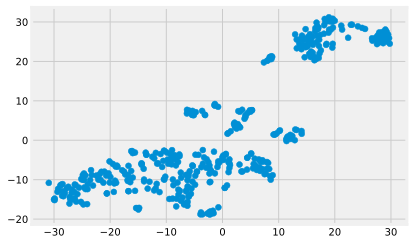

In [97]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание №2.

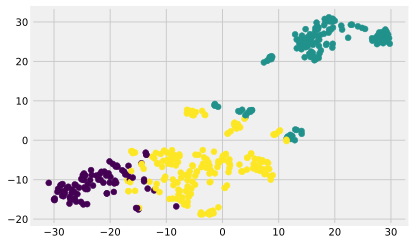

In [99]:
kmeans=KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train=kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [100]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [102]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [104]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [105]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [106]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [107]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

Задание №3.

In [108]:
test_labels=kmeans.predict(X_test_scaled)

In [113]:
X_test_tsne=tsne.fit_transform(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


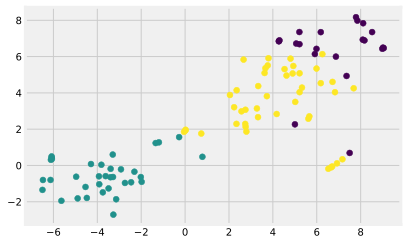

In [114]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()